
<img align="left" width="175" height="100" src="svd.png">
&nbsp;                                                                                                                            
&nbsp;

# <center> <h1>SVD and KNN</h1> </center> 
&nbsp;                                                                                                                            
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;                                                                                                                            
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp; 
by Jesse P. Gutierrez Jr
   UHD, Data Science




#### Singular Value Decomposition and K- Nearest Neighbor

K-Nearest Neighbor Algorithm (KNN) is a classification algorithm. It is designed as a predictor after referencing correctly classified data into proper groups, known as reference data.

Singular-value decomposition (SVD) "is a factorization of a real or complex matrix"(1). As you can see in the above picture, $\mathcal{M}$ is the factorization of $ \mathcal{U}\Sigma\mathcal{V}$.

So, we explore the "house" data and place it into a symmetric matrix, converted from strings "y" and "n" into binary integers 1 and 0 and name it "A_0".&nbsp; 
<center> * $\mathcal{A_0^{T}}\mathcal{A_0} = \mathcal{A_0}$ : symmetric matrix house </center>
&nbsp;

Then we apply the SVD process to the matrix.  Followed by implementing the KNN algorithm to determine if the voter's group can be decried. 


The singular value decompostition can be applied to any matrix, in other words, any matrix can be broken down (decomposed) into three matrices.
Matrices being funtors, three matrices gotten from from svd can be thought of in the physical sense as 
a rotation, stretch and finally another rotation 

* $\mathcal{A_0} \in \mathbb{F^{m \times n}}  = \mathcal{U}\Sigma\mathcal{V^{*}}$
* $\mathcal{U}$ : all columns are orthogonal to each other, and physically a rotation matrix
* $\Sigma$ : a diagonal martix and $\sigma_{i}$ < $\sigma_{i-1}$ 
* $\mathcal{V^{*}}$ : all columns are orthogonal to each other, and physically a rotation matrix

The $*$ in the matrix V is just indicative of a complex conjugate. If all elements of V are real numbers then V is actually:

* $\mathcal{V^{T}}$ 

For our process we will be relegated to 

 <center>* $\mathcal{A_0} \in \mathbb{R^{m \times n}}  = \mathcal{U}\Sigma\mathcal{V^{T}}$</center>



The connection between the matrix A and the components of each of the the decomposed matrics is
<center>* $\mathcal{A}\mathcal{v_{i}} = \sigma_{i}\mathcal{u_{i}}$ , where $\mathcal{v_{i}} \in \mathcal{V^{*}}, \sigma_{i} \in \Sigma, \mathcal{u_{i}} \in \mathcal{U}$</center>


The KNN algorithm clusters the data the distances from a point and closest corresponding neighbor. The aggregate data points surrounding the point in question, would indicate the predicted group.

Since the algorithm involves distances, the <em>function euclidian_distance</em> is calculated by the distance for formula. We use euclidiean distance due to the projection of these vectors what whatever space to 2-dimensional space.

&nbsp;
&nbsp;

<center>$\text{euclidean_distance} = \sqrt{(x_{2}-x_{1})^2+(y_{2}-y_{1})^2}$</center>
&nbsp;
&nbsp;
&nbsp;
&nbsp;

Reference:

(1) Singular value decomposition, https://en.wikipedia.org/wiki/Singular_value_decomposition 

(2) Julia 1.1 Documentation, https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/index.html

(3) Dimensionality reduction, https://en.wikipedia.org/wiki/Dimensionality_reduction
 
<em>(4) Assistant: Joshua, Data Science Student</em>

In [110]:
using CSV, LinearAlgebra, Plots
theme(:dark)
house = CSV.read("house-votes-84.data")            #read data into house
house

,republican,n,y,n_1,y_1,y_2,y_3,n_2,n_3,n_4,y_4,?,y_5,y_6,y_7,n_5,y_8
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [111]:
m,n = size(house)[1], size(house)[2]       #explore data size is a 434 x 17 matrix

(434, 17)

In [120]:
m,n = size(house)[1], size(house)[2]       #set matrix

A_0 = zeros(m, n-1)
for i = 1 : m                              # for loop thru the matrix classify votes "y" = 1
    for j = 1 : n-1                        # and for votes "n" = 0 making the matrix binary
        if house[i, j+1] == "y"            # integers
            A_0[i,j] = 1
        elseif house[i, j+1] == "n"
            A_0[i,j] = 0
        else
            A_0[i,j] = -1
        end
    end        
end    

A_0                              #Existing matrix

434×16 Array{Float64,2}:
  0.0   1.0   0.0   1.0   1.0   1.0  …   0.0   1.0   1.0   1.0   0.0  -1.0
 -1.0   1.0   1.0  -1.0   1.0   1.0      1.0   0.0   1.0   1.0   0.0   0.0
  0.0   1.0   1.0   0.0  -1.0   1.0      1.0   0.0   1.0   0.0   0.0   1.0
  1.0   1.0   1.0   0.0   1.0   1.0      1.0  -1.0   1.0   1.0   1.0   1.0
  0.0   1.0   1.0   0.0   1.0   1.0      0.0   0.0   1.0   1.0   1.0   1.0
  0.0   1.0   0.0   1.0   1.0   1.0  …   0.0   0.0  -1.0   1.0   1.0   1.0
  0.0   1.0   0.0   1.0   1.0   1.0      0.0   0.0   1.0   1.0  -1.0   1.0
  0.0   1.0   0.0   1.0   1.0   1.0      0.0   1.0   1.0   1.0   0.0   1.0
  1.0   1.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0  -1.0  -1.0
  0.0   1.0   0.0   1.0   1.0   0.0     -1.0  -1.0   1.0   1.0   0.0   0.0
  0.0   1.0   0.0   1.0   1.0   1.0  …   1.0  -1.0   1.0   1.0  -1.0  -1.0
  0.0   1.0   1.0   0.0   0.0   0.0      0.0   0.0   1.0   0.0  -1.0  -1.0
  1.0   1.0   1.0   0.0   0.0   1.0      1.0  -1.0   0.0   0.0   1.0  -1.0


In [121]:
A_0 = A_0'                               #Transpose the new matrix

16×434 Adjoint{Float64,Array{Float64,2}}:
  0.0  -1.0   0.0   1.0  0.0   0.0   0.0  …   1.0  0.0  0.0   0.0   0.0   0.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0      0.0  0.0  0.0  -1.0   0.0   1.0
  0.0   1.0   1.0   1.0  1.0   0.0   0.0      1.0  1.0  1.0   0.0   0.0   0.0
  1.0  -1.0   0.0   0.0  0.0   1.0   1.0      0.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0  -1.0   1.0  1.0   1.0   1.0     -1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.0  1.0   1.0   1.0  …   0.0  1.0  0.0   1.0   1.0   1.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  0.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0  0.0   0.0   0.0      1.0  1.0  1.0   0.0  -1.0   1.0
  0.0   1.0   1.0   1.0  0.0   0.0   0.0  …   0.0  0.0  0.0   1.0   0.0   0.0
  1.0   0.0   0.0  -1.0  0.0   0.0   0.0      1.0  1.0  0.0   1.0   1.0   1.0
  1.0   1.0   1.0   1.

In [118]:
#train_A_0 = copy(A_0[:, 1:300])          #explore the copy train_A_0

In [122]:
train_A_0 = copy(A_0[:, 1:300])
test_A_0 = copy(A_0[:,301:434])
A = copy(train_A_0)

for i = 1:size(A)[1]
    avg = sum(A[i,:])/size(A)[2]
    for j = 1:size(A)[2]
        A[i,j] -= avg
    end
end

S = A*A'/(size(A)[2]-1)

16×16 Array{Float64,2}:
  0.295608    0.0254849     0.121204   …  -0.0736901    0.09068    0.0182386 
  0.0254849   0.467458      0.0185284     -0.00317726  -0.0029097  0.00508361
  0.121204    0.0185284     0.291237      -0.140134     0.161405   0.0168562 
 -0.0679822   0.0347492    -0.157926       0.162821    -0.105095   0.0344705 
 -0.0697882   0.0578595    -0.161873       0.196767    -0.119175   0.0316611 
 -0.0845708   0.0559532    -0.10214    …   0.169844    -0.0901784  0.0239019 
  0.106065   -0.0343478     0.168763      -0.104404     0.130557   0.0640357 
  0.113489   -0.0314381     0.204682      -0.12932      0.140691   0.0176143 
  0.0565663  -0.0286622     0.143344      -0.112765     0.108149   0.0780825 
 -0.0192196  -0.000602007   0.0121739      0.0656633    0.0275808  0.0969454 
  0.0470234   0.112074      0.0836789  …  -0.00953177   0.0942809  0.0627425 
 -0.0681605   0.0226421    -0.138662       0.160702    -0.0998997  0.0418729 
 -0.0788629   0.0771572    -0.123278    

In [102]:
#U, ∑, V = svd(S)                  #explore the SVD

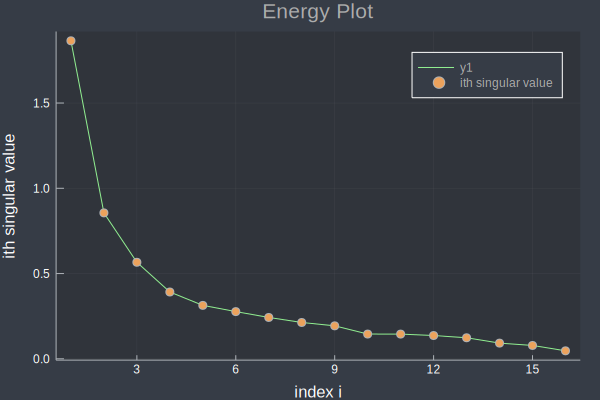

In [123]:
U, ∑, V = svd(S)    #Compute the singular value decomposition (SVD) of A 
                    #and return an SVD object.

plot(∑, color = "lightgreen", legend = true)
scatter!(∑, xlabel = "index i", 
            ylabel = "ith singular value", 
            title = "Energy Plot", 
            label = "ith singular value", legend =true)

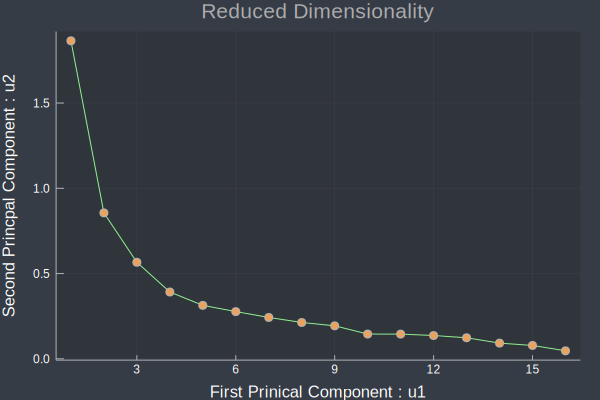

In [124]:
#"dimensionality reduction or dimension reduction is the 
#process of reducing the number of random variables under consideration"(3).

U_min = U[: , 1 : 2]                           

scatter!(xaxis = "First Prinical Component : u1", 
    yaxis="Second Princpal Component : u2",
    legend = false, title = "Reduced Dimensionality")
#In mathematics, a complex square matrix U is unitary if its conjugate transpose
#U∗ is also its inverse—that is, if
#     U*U = UU* = I

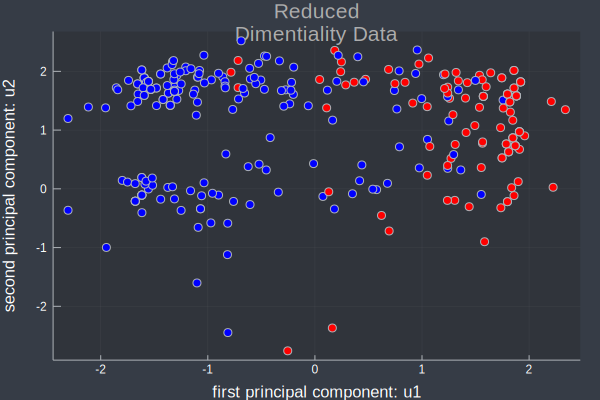

In [125]:
U_min = U[:,1:2]

scatter(xaxis = "first principal component: u1",
    yaxis = "second principal component: u2", legend = false, title = "Reduced 
    Dimentiality Data")

for i = 1:size(sample_A_0)[2]
    p = U_min'*sample_A_0[:,i]
    party = house[i,1] == "republican" ? "red" : "blue"
    scatter!((p[1],p[2]), color = party)
end
scatter!()

In [127]:
training_data = U_min'*sample_A_0
training_data = [(training_data[1,i], training_data[2,i]) for i = 1:300]
training_data           

300-element Array{Tuple{Float64,Float64},1}:
 (1.8591981549493908, -0.11492898236275861)  
 (0.7894052510511225, 0.7155558955205518)    
 (-0.06151151305333569, 1.4143422237693315)  
 (0.2045043375601921, 1.8305092727967067)    
 (0.7422683699338614, 1.6732984214428943)    
 (0.7653275445815161, 1.3593810759348668)    
 (1.8249499447065918, 1.3060186508635279)    
 (1.8815822118285679, 1.582539706873973)     
 (-1.068206428379116, -0.3401077472555941)   
 (1.0495460809735233, 0.23117470129874262)   
 (1.4406563062089583, -0.30390129098809926)  
 (-0.6056985864923029, -0.2679230475338178)  
 (-1.0350868234877204, 0.1029438861154387)   
 ⋮                                           
 (0.43830972613734254, 0.4067164028110327)   
 (-0.2238949535837122, 1.6782148203690346)   
 (-1.0313326168384798, 1.8026414701392397)   
 (-0.4707724782498003, 2.2613305751386914)   
 (-0.6887331847825773, 2.5202771735126293)   
 (-0.012710996074958346, 0.42939782221016276)
 (1.584149324662288, -0.90049512964

In [128]:
#defining euclidean distance and k-nearest-neighbors functions

function distance(p1,p2)
    return sqrt((p2[1]-p1[1])^2 + (p2[2]-p1[2])^2)
end
#k-nearest-neighbors
function K_nearest(k, train_data, input, party)   # input is an instance of data. 
    point = U_min'*input
    point = (point[1],point[2])
    neighbors = []
    for i = 1 : length(train_data)
        p = train_data[i]
        d = distance(point,p)
        push!(neighbors,(house[i,1],p,d))
    end
    sort!(neighbors, by = x -> x[3])
    return
end


K_nearest (generic function with 1 method)

In [129]:
function K_nearest_prediction(k, i)
    point = U_min'*test_A_0[:, i]               #projection onto subspace spanned by u1, u2
    point = (point[1], point[2])                # points (x,y) for for each projected vector
    train_data = U_min'*A_0
    train_data = [(train_data[1, j], train_data[2,j])
                        for j = 1:size(train_data)[2]]
   
    #calculating and storing each distance for k amount of neighbours
    neighbors = []
    for j = 1:length(train_data)
        p = train_data[j]
        d = distance(point, p)
        push!(neighbors, (house[j, 1], p, d))
    end
    
    sort!(neighbors, by = x -> x[3])      #sorting the distances in by measure of proximity
    neighbors = neighbors[1:k]            #truncating the list to the count of k distances
    
    #Plotting then adding to the plot and appearance by position of line call
    scatter(xaxis = "First Principal Component: u1",
        yaxis = "Second Principal Conponent: u2",
        legend = false,
        title = "Projected Data unto u1, u2")
    
    #adding and coloring each point in the data based on political affilation
    for i = 1 : size(train_A_0)[2]
        p = U_min'*train_A_0[:, i]
        party = house[i,1] == "republican" ? "red" : "blue"
        scatter!([(p[1],p[2])], color = party)
    end
    
    
    #Each point is plotting with respect to neigbors and political affilation
    for i = 1:k
        plot!([point, neighbors[i][2]], color = "yellow" )
        scatter!([point,neighbors[i][2]], color = neighbors[i][1] == "republican" ? 
            "red" : "blue")
    end
    
    #Count of neighbors by party affilation
    D = 0
    R = 0
    for i = 1 : length(neighbors)
        if (neighbors[i,1][1]) == "republican"
            R+= 1    
        else 
            D +=1
        end
    end
    party = R > D ? "republican" : "democrat"
        
    
    println(i, " is predicted to belong to the ", party, " party")
    
    #plot the point
    scatter!([point], label = party, color = "white")
end
    
    
    

K_nearest_prediction (generic function with 1 method)

30 is predicted to belong to the republican party


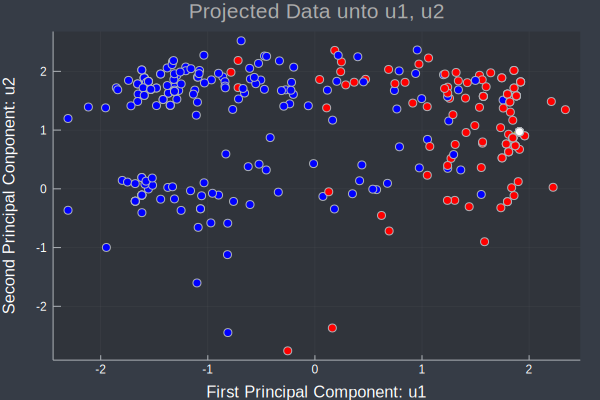

In [130]:
K_nearest_prediction(12,30)

75 is predicted to belong to the democrat party


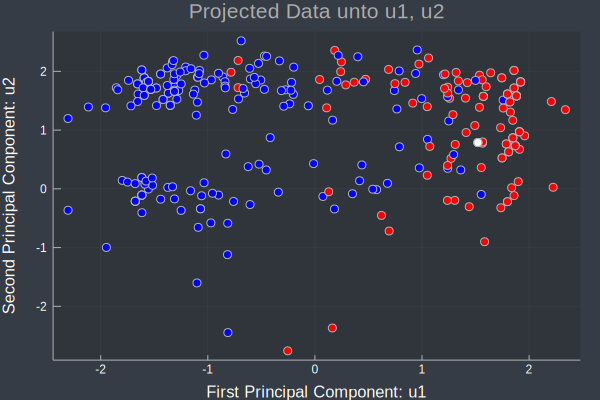

In [131]:
K_nearest_prediction(1,75)

100 is predicted to belong to the republican party


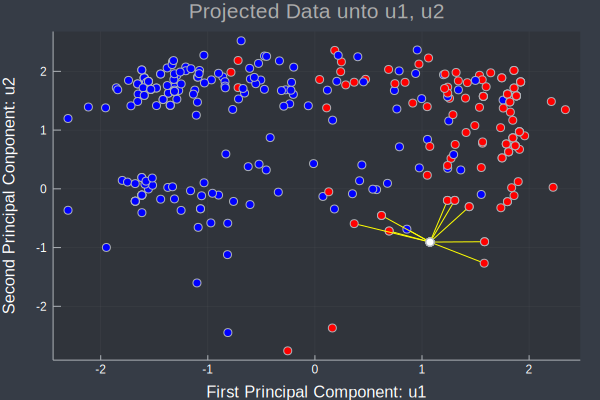

In [132]:
K_nearest_prediction(10,100)

17 is predicted to belong to the democrat party


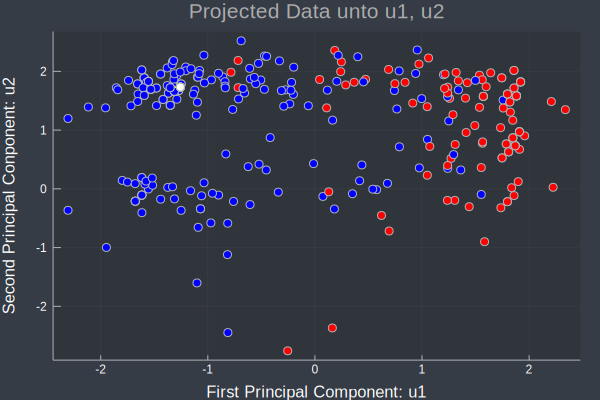

In [133]:
K_nearest_prediction(10,17)